### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [121]:
df = pd.read_csv('coupons.csv')

In [123]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [126]:
print(df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [129]:
# First drop 'car' column 
df = df.drop(columns=['car'], axis=1)

# Fill in null cells with the mode value
miss_vals = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in miss_vals:
    df[column] = df[column].fillna(df[column].mode()[0])
    
# Verify changes to ensure no more null values 
print(df.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [132]:
accepted = df['Y'].mean()
accepted_percent = accepted * 100
print(f"Proportion: {accepted:.2f}")
print(f"Percentage: {accepted_percent:.2f}%")
print("Seems like about 57% of the customers accepted the coupon.")

Proportion: 0.57
Percentage: 56.84%
Seems like about 57% of the customers accepted the coupon.


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

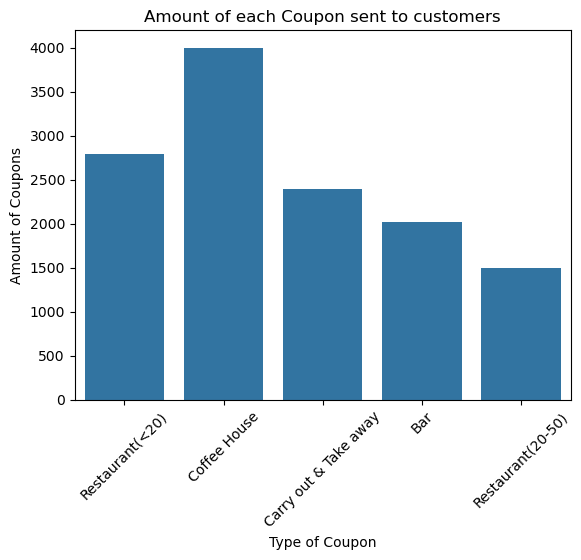

In [135]:
sns.countplot(data=df, x='coupon')
plt.title('Amount of each Coupon sent to customers')
plt.xlabel('Type of Coupon')
plt.ylabel('Amount of Coupons')
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Amount reported')

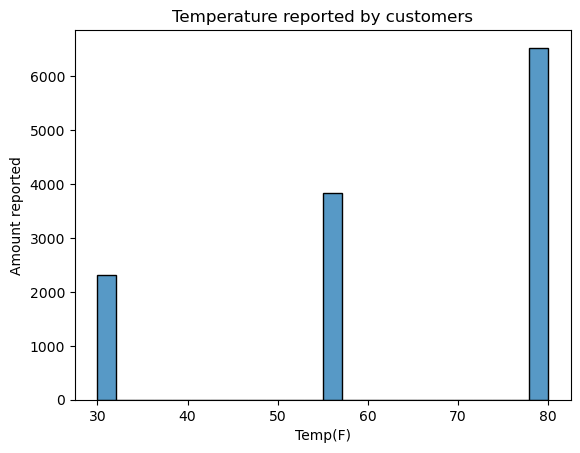

In [138]:
sns.histplot(df['temperature'])
plt.title('Temperature reported by customers')
plt.xlabel('Temp(F)')
plt.ylabel('Amount reported')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [145]:
bar = df[df['coupon'] == 'Bar']
print(bar)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [148]:
accepted_bar = bar['Y'].mean()
percent_bar = accepted_bar * 100
print(f"Proportion: {accepted_bar:.2f}")
print(f"Percent: {percent_bar:.2f}%")
print("We can see that 40% of the Bar coupons were accepted")

Proportion: 0.41
Percent: 41.00%
We can see that 40% of the Bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


9        0.0
13       0.0
17       0.0
24       0.0
35       0.0
        ... 
12663    0.0
12664    0.0
12667    0.0
12670    0.0
12682    0.0
Name: Bar_int, Length: 2017, dtype: float64
Proportions:
Bar_category
<= 3 times    0.370737
> 3 times     0.768844
Name: Y, dtype: float64

Percentages:
Bar_category
<= 3 times    37.073707
> 3 times     76.884422
Name: Y, dtype: float64
We can see that 37% of the people who go to the restaurant less than 3 times accept the coupon. And 77% of people who go to the restaurant more than 3 times accept the coupon.


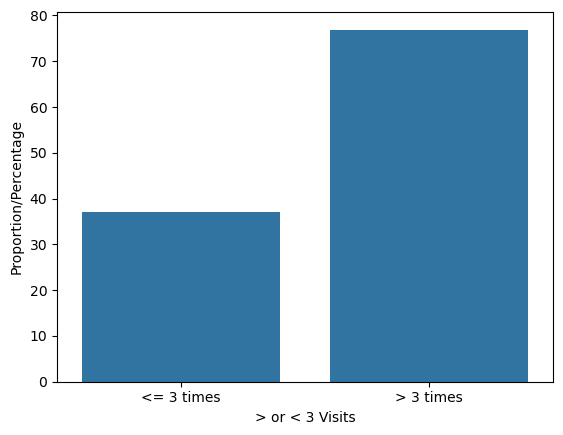

In [319]:
# because of how the data was collected the values in Bar column are both string and integer 
# first lets change the string values and range values to a single integer
# I will give numeric values to each
bar = bar.copy()
bar_reconfig = {'never': 0, 'less1': 0.9, '1~3': 2, '4~8': 4, 'gt8': 9}
bar['Bar_int'] = bar['Bar'].map(bar_reconfig)
#check to see if values changed
print(bar['Bar_int'])

bar['Bar_category'] = bar['Bar_int'].apply(lambda x: '<= 3 times' if x <= 3 else '> 3 times');
bar_proportions = bar.groupby('Bar_category')['Y'].mean();
bar_percent = proportions * 100;


print("Proportions:")
print(bar_proportions)
print("\nPercentages:")
print(bar_percent)

print("We can see that 37% of the people who go to the restaurant less than 3 times accept the coupon. And 77% of people who go to the restaurant more than 3 times accept the coupon.")
plot_data = pd.DataFrame({'Category': proportions.index, 'Proportion': proportions.values, 'Percentage': percentages.values})
sns.barplot(data=plot_data, x='Category', y='Percentage')
plt.xlabel('> or < 3 Visits')
plt.ylabel('Proportion/Percentage')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Proportions by Group:
Group
Bar>1 / Age>25    0.70
Rest              0.34
Name: Y, dtype: object

Percentages by Group:
Group
Bar>1 / Age>25    69.52
Rest              33.50
Name: Y, dtype: object


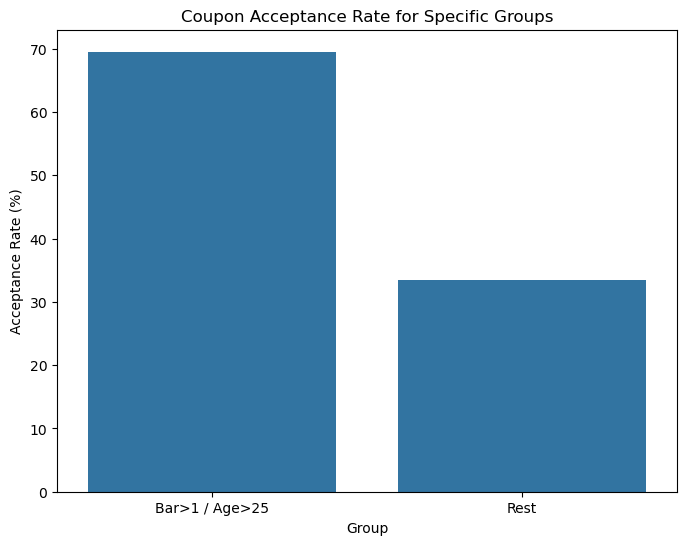

Of the people who accept Bar coupons about 70% of people go more than once a month and are over the age of 25


In [257]:
#Create the Groups
bar['age'] = bar['age'].astype(str).str.extract(r'(\d+)').astype(float)

condition1 = (bar['Bar_int'] > 1) & (bar['age'] > 25)
condition2 = ~condition1

bar['Group'] = 'Rest'
bar.loc[condition1, 'Group'] = 'Bar>1 / Age>25'

#Calculate Proportions
group_proportions = bar.groupby('Group')['Y'].mean()
group_percentages = group_proportions * 100

formatted_group_proportions = group_proportions.apply(lambda x: f"{x:.2f}")
formatted_group_percentages = group_percentages.apply(lambda x: f"{x:.2f}")

print("Proportions by Group:")
print(formatted_group_proportions)
print("\nPercentages by Group:")
print(formatted_group_percentages)

#Create a DataFrame for plotting
group_plot_data = pd.DataFrame({'Group': group_proportions.index, 'Proportion': group_proportions.values, 'Percentage': group_percentages.values})

#Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=group_plot_data, x='Group', y='Percentage')
plt.title('Coupon Acceptance Rate for Specific Groups')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')
plt.show()

print("Of the people who accept Bar coupons about 70% of people go more than once a month and are over the age of 25")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Proportions by Group:
Group
Bar>1 / No Kid(s) / No Farm/Fish..    0.71
Rest                                  0.30
Name: Y, dtype: object

Percentages by Group:
Group
Bar>1 / No Kid(s) / No Farm/Fish..    71.32
Rest                                  29.60
Name: Y, dtype: object


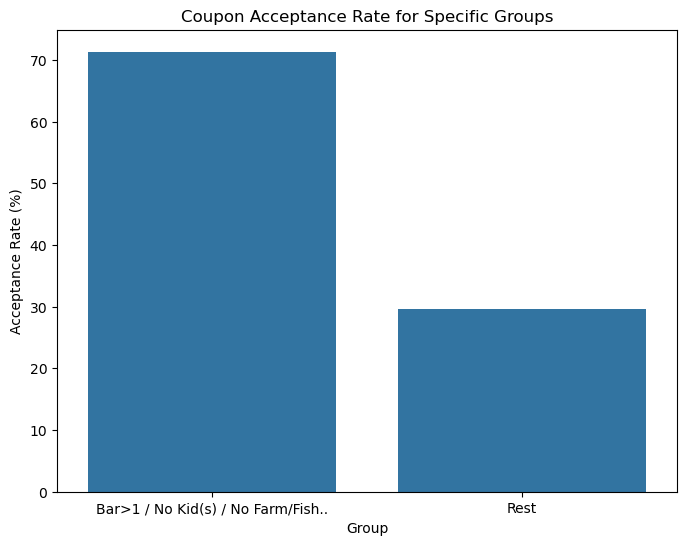

71% of the people who accept Bar coupons go more than once a month, have no kids, and are not in farming, fishing, or forestry industry


In [255]:
condition1 = (bar['Bar_int'] > 1)
condition2 = bar['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])
condition3 = ~bar['occupation'].str.contains('farming fishing or forestry', case=False, na=False)

bar['Group'] = 'Rest'
bar.loc[condition1 & condition2 & condition3, 'Group'] = 'Bar>1 / No Kid(s) / No Farm/Fish..'

group_proportions = bar.groupby('Group')['Y'].mean()
group_percentages = group_proportions * 100

formatted_group_proportions = group_proportions.apply(lambda x: f"{x:.2f}")
formatted_group_percentages = group_percentages.apply(lambda x: f"{x:.2f}")

print("Proportions by Group:")
print(formatted_group_proportions)
print("\nPercentages by Group:")
print(formatted_group_percentages)

group_plot_data = pd.DataFrame({'Group': group_proportions.index, 'Proportion': group_proportions.values, 'Percentage': group_percentages.values})

plt.figure(figsize=(8, 6))
sns.barplot(data=group_plot_data, x='Group', y='Percentage')
plt.title('Coupon Acceptance Rate for Specific Groups')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')
plt.show()

print("71% of the people who accept Bar coupons go more than once a month, have no kids, and are not in farming, fishing, or forestry industry")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Proportions by Group:
Group
Bar>1 / Age<30    0.72
Rest              0.35
Name: Y, dtype: object

Percentages by Group:
Group
Bar>1 / Age<30    72.17
Rest              34.57
Name: Y, dtype: object


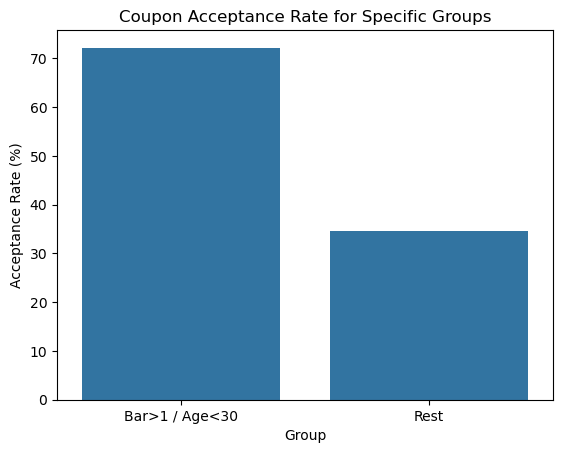

Again we see that 72% of the people who accept bar coupons go more than once a month and are over 30


In [253]:
condition1 = (bar['Bar_int'] > 1)
condition2 = (bar['age'].astype(str).str.extract(r'(\d+)').astype(int)[0] < 30)

bar['Group'] = 'Rest'
bar.loc[condition1 & condition2, 'Group'] = 'Bar>1 / Age<30'

group_proportions = bar.groupby('Group')['Y'].mean()
group_percentages = group_proportions * 100

formatted_group_proportions = group_proportions.apply(lambda x: f"{x:.2f}")
formatted_group_percentages = group_percentages.apply(lambda x: f"{x:.2f}")

print("Proportions by Group:")
print(formatted_group_proportions)
print("\nPercentages by Group:")
print(formatted_group_percentages)

group_plot_data = pd.DataFrame({'Group': group_proportions.index, 'Proportion': group_proportions.values, 'Percentage': group_percentages.values})

sns.barplot(data=group_plot_data, x='Group', y='Percentage')
plt.title('Coupon Acceptance Rate for Specific Groups')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')
plt.show()

print('Again we see that 72% of the people who accept bar coupons go more than once a month and are over 30')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [251]:
print('Based on the analysis we can say that about overall 70% of the people who are sent a bar coupon use it more than once a month. Seeing age groups such as over 25 and 30 and seeing who has kids and what occupation they have also showed an average of 70% coupon users.')

Based on the analysis we can say that about overall 70% of the people who are sent a bar coupon use it more than once a month. Seeing age groups such as over 25 and 30 and seeing who has kids and what occupation they have also showed an average of 70% coupon users.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# I will Compare the acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.

In [267]:
cheap_rest = df[df['coupon'] == 'Restaurant(<20)']
print(cheap_rest)

           destination  passanger weather  temperature  time           coupon  \
0      No Urgent Place      Alone   Sunny           55   2PM  Restaurant(<20)   
5      No Urgent Place  Friend(s)   Sunny           80   6PM  Restaurant(<20)   
7      No Urgent Place     Kid(s)   Sunny           80  10AM  Restaurant(<20)   
10     No Urgent Place     Kid(s)   Sunny           80   2PM  Restaurant(<20)   
11     No Urgent Place     Kid(s)   Sunny           55   2PM  Restaurant(<20)   
...                ...        ...     ...          ...   ...              ...   
12666  No Urgent Place  Friend(s)   Snowy           30   2PM  Restaurant(<20)   
12668  No Urgent Place      Alone   Sunny           80  10AM  Restaurant(<20)   
12671  No Urgent Place    Partner   Snowy           30  10AM  Restaurant(<20)   
12677             Home    Partner   Sunny           30   6PM  Restaurant(<20)   
12678             Home    Partner   Sunny           30  10PM  Restaurant(<20)   

      expiration  gender ag

In [293]:
#find acceptance rate of restaurant less than 20
accepted_cheap_rest = cheap_rest['Y'].mean()
percent_cheap_rest = accepted_cheap_rest * 100
print(f"Proportion: {accepted_cheap_rest:.2f}")
print(f"Percent: {percent_cheap_rest:.2f}%")
print('Of the people who recieve a coupon for a restaurant less than 20, about 70% of people accept it.')

Proportion: 0.71
Percent: 70.71%
Of the people who recieve a coupon for a restaurant less than 20, about 70% of people accept it.


0        4.0
5        4.0
7        4.0
10       4.0
11       4.0
        ... 
12666    4.0
12668    4.0
12671    4.0
12677    4.0
12678    4.0
Name: RestaurantLessThan20_int, Length: 2786, dtype: float64
Proportions:
RestaurantLessThan20_category
<= 4 times    0.700961
> 4 times     0.760417
Name: Y, dtype: float64
We can see that 70% of the people who go to the restaurant less than 4 times accept the coupon. And 76% of people who go to the restaurant more than 4 times accept the coupon.


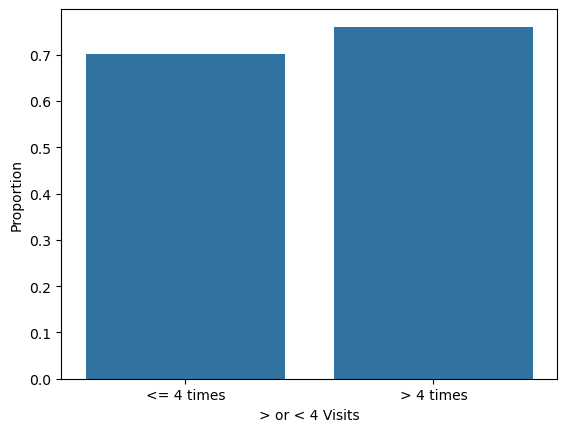

In [331]:
# because of how the data was collected the values in Bar column are both string and integer 
# first lets change the string values and range values to a single integer
# I will give numeric values to each
cheap_rest = cheap_rest.copy()
cheap_rest_reconfig = {'never': 0, 'less1': 0.9, '1~3': 2, '4~8': 4, 'gt8': 9}
cheap_rest['RestaurantLessThan20_int'] = cheap_rest['RestaurantLessThan20'].map(cheap_rest_reconfig)
#check to see if values changed
print(cheap_rest['RestaurantLessThan20_int'])

cheap_rest['RestaurantLessThan20_category'] = cheap_rest['RestaurantLessThan20_int'].apply(lambda x: '> 4 times' if x > 4 else '<= 4 times')
cheap_rest_proportions = cheap_rest.groupby('RestaurantLessThan20_category')['Y'].mean()

print("Proportions:")
print(cheap_rest_proportions)

print("We can see that 70% of the people who go to the restaurant less than 4 times accept the coupon. And 76% of people who go to the restaurant more than 4 times accept the coupon.")

plot_data = pd.DataFrame({'Category': cheap_rest_proportions.index, 'Proportion': cheap_rest_proportions.values})
sns.barplot(data=plot_data, x='Category', y='Proportion')
plt.xlabel('> or < 4 Visits')
plt.ylabel('Proportion')
plt.show()

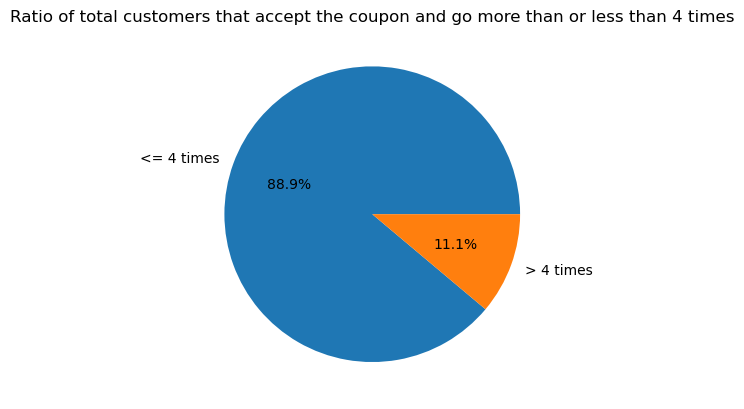

In [343]:
#pie chart for visual out of total people who accept
accept_by_4 = cheap_rest.groupby('RestaurantLessThan20_category')['Y'].sum()

total = accept_by_4.sum()
accept_ratio = accept_by_4 / total
clean_total = accept_ratio.apply(lambda x: f"{x:.2f}")
plt.pie(accept_ratio, labels=accept_ratio.index, autopct='%1.1f%%')
plt.title('Ratio of total customers that accept the coupon and go more than or less than 4 times')
plt.show()

In [379]:
print('I want to see of the customers who go to the restaurant more than 4 times who accept the coupon, how many of them drive in the direction_opp')

cheap_rest = cheap_rest.copy()  
cheap_rest_reconfig = {'never': 0, 'less1': 0.9, '1~3': 2, '4~8': 4, 'gt8': 9}
cheap_rest['RestaurantLessThan20_int'] = cheap_rest['RestaurantLessThan20'].map(cheap_rest_reconfig)

print(cheap_rest[['RestaurantLessThan20', 'RestaurantLessThan20_int']].head())
print(cheap_rest['RestaurantLessThan20_int'].unique())

accept_coupon_for_direction = cheap_rest[(cheap_rest['RestaurantLessThan20_int'] > 4) & (cheap_rest['Y'] == 1)]
print(accept_coupon_for_direction)



I want to see of the customers who go to the restaurant more than 4 times who accept the coupon, how many of them drive in the direction_opp
   RestaurantLessThan20  RestaurantLessThan20_int
0                   4~8                       4.0
5                   4~8                       4.0
7                   4~8                       4.0
10                  4~8                       4.0
11                  4~8                       4.0
[4.  2.  0.9 9.  0. ]
           destination  passanger weather  temperature  time           coupon  \
154    No Urgent Place      Alone   Sunny           55   2PM  Restaurant(<20)   
161    No Urgent Place  Friend(s)   Sunny           80   2PM  Restaurant(<20)   
174               Work      Alone   Sunny           55   7AM  Restaurant(<20)   
452    No Urgent Place      Alone   Sunny           55   2PM  Restaurant(<20)   
459    No Urgent Place  Friend(s)   Sunny           80   2PM  Restaurant(<20)   
...                ...        ...     ...          

In [377]:
num_opp_direction = accept_coupon_for_direction['direction_opp'].sum()
total_customers = len(accept_coupon_for_direction)
proportion_opp_direction = num_opp_direction / total_customers
formatted_proportion_opp_direction = f"{proportion_opp_direction:.2f}"
print(f"Number of customers driving in opposite direction: {num_opp_direction}")
print(f"Total number of customers: {total_customers}")
print(f"Proportion of customers driving in opposite direction: {formatted_proportion_opp_direction}")

Number of customers driving in opposite direction: 185
Total number of customers: 219
Proportion of customers driving in opposite direction: 0.84


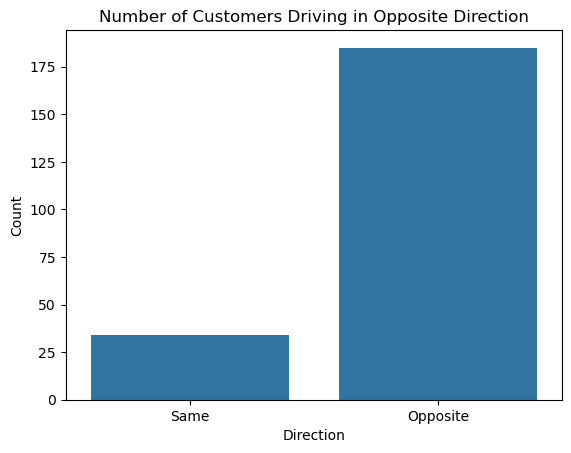

Seems like a lot of customers drive the opposite direction for low end restaurants. A further analysis of income could tell us the income range of people that drive in opposite direction for low-end restaurants. This could indicate it being a financial choice for most people.


In [403]:
plot_data = pd.DataFrame({'Direction': ['Same', 'Opposite'], 'Count': [total_customers - num_opp_direction, num_opp_direction]})

sns.barplot(data=plot_data, x='Direction', y='Count')
plt.title('Number of Customers Driving in Opposite Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.show()

print('Seems like a lot of customers drive the opposite direction for low end restaurants. A further analysis of income could tell us the income range of people that drive in opposite direction for low-end restaurants. This could indicate it being a financial choice for most people.')